### Predicting Future Trends in Main Abuse Inquiries, Using Linear Regression for SRV Helpline

This is a basic machine learning model that uses linear regression to predict future trends for the main types of abuse, reported to the SRV  helpline. (Data can be found from "Documentation/SRV Helpline Data.pdf") This approach provides a simple method to forecast future patterns using historical data. This is valuable for the SRV helpline as it helps in better planning and resource allocation. By predicting future trends, helpline staff can be better prepared for the number and types of inquires they will receive. This helps them respond more quickly and efficiently, plan training, make strategic decisions and provide better customer service.

Example 1: The web application can include a dashboard that visualizes both historical data and future forecasts. Graphs/charts can display the predicted trends for different types of abuse inquiries, providing helpline staff with an easy-to-understand interface.

Example 2: The system can generate automated alerts and notifications for the helpline staff when predicted inquiry volumes are expected to rise. This ensures that the staff are always prepared and can respond promptly to increased demand.

          

**(Note: The below predictions may have less accuracy due to the limited data being available and used for training. However, they provide a basic understanding and serve as a starting point for further exploration of AI/ML integration within the web application.)**

#### Code Explanation -

1. Data Preparation and Preprocessing:

The code begins by creating a dictionary of the past years abuse inquiry data, which is then converted into a DataFrame. The 'Year' column, containing ranges of years, is parsed to obtain their midpoint years using the 'parse_year' function. This converts the ranges to a single representative year. Missing values are handled by filling gaps with the last known value. Finally, the 'Year' column is converted to a numeric format, preparing the dataset for training the linear regression model to predict future trends.

2. Linear Regression Predicting:

'forecast_trend' function is used to train a linear regression model and forecast future trends. This model is trained using the historical data for each type of abuse inquiry. It then predicts future values for the next five years. The historical data and forecasts are combined and plotted for each type of inquiry, providing a visual representation of both past and predicted trends.

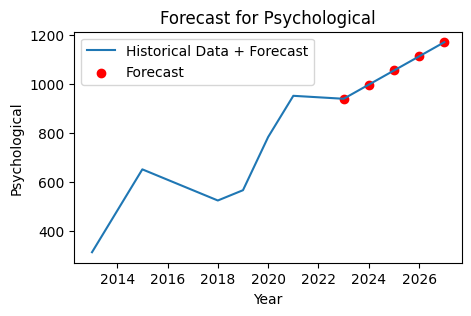

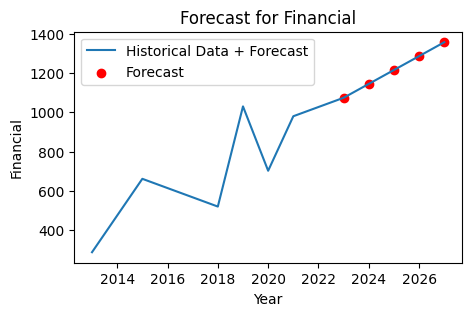

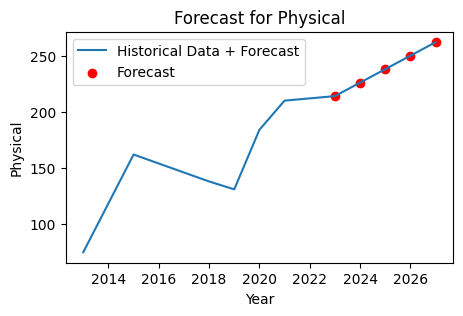

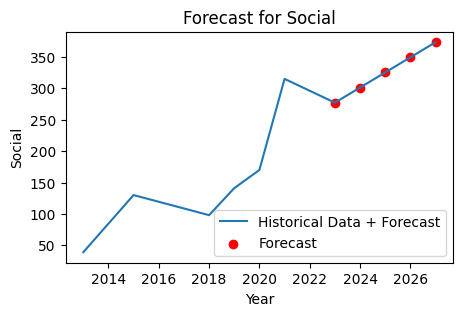

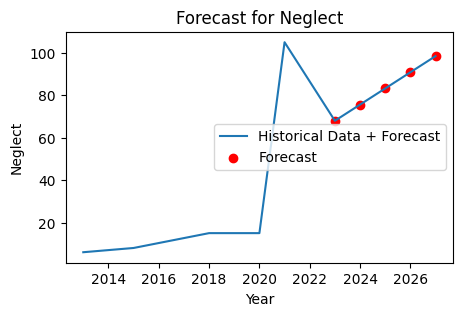

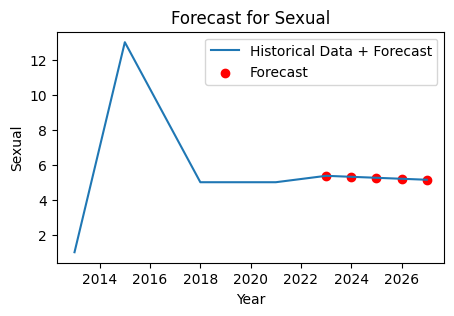

Future predictions for Psychological:
2023: 939.90
2024: 997.57
2025: 1055.24
2026: 1112.91
2027: 1170.58
Future predictions for Financial:
2023: 1073.84
2024: 1144.40
2025: 1214.96
2026: 1285.53
2027: 1356.09
Future predictions for Physical:
2023: 214.00
2024: 226.00
2025: 238.00
2026: 250.00
2027: 262.00
Future predictions for Social:
2023: 277.13
2024: 301.19
2025: 325.25
2026: 349.30
2027: 373.36
Future predictions for Neglect:
2023: 67.97
2024: 75.59
2025: 83.21
2026: 90.83
2027: 98.45
Future predictions for Sexual:
2023: 5.37
2024: 5.31
2025: 5.25
2026: 5.20
2027: 5.14


In [26]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Data Preparation
data = {
    "Year": ["2012 - 2014", "2015-2016", "2017-2019", "2019", "2020", "1 July 2021 – 30 June 2022"],
    "Psychological": [314, 652, 525, 567, 784, 952],
    "Financial": [289, 662, 521, 1030, 703, 980],
    "Physical": [75, 162, 138, 131, 184, 210],
    "Social": [39, 130, 98, 141, 170, 315],
    "Neglect": [6, 8, 15, None, None, 105],
    "Sexual": [1, 13, 5, None, None, None]
}

df = pd.DataFrame(data)

# Preprocess data
def parse_year(year_str):
    if '–' in year_str:
        start_year, end_year = year_str.split('–')
    elif '-' in year_str:
        start_year, end_year = year_str.split('-')
    else:
        return int(year_str)

    start_year = int(start_year.split()[-1].strip()) if 'July' not in start_year else 2021
    end_year = int(end_year.split()[-1].strip()) if 'June' not in end_year else 2022

    return (start_year + end_year) // 2  # Takes the midpoint year for the range

df['Year'] = df['Year'].apply(parse_year)

# Handle missing values
df.fillna(method='ffill', inplace=True)

# Year converted to a numeric format
df['Year'] = pd.to_numeric(df['Year'])

# Train data and forecast using Linear Regression
def forecast_trend(df, column, start_year, years_to_predict):
    X = df[['Year']]
    y = df[column]

    # Train the model
    model = LinearRegression()
    model.fit(X, y)

    # Predict future values
    future_years = np.array(range(start_year, start_year + years_to_predict)).reshape(-1, 1)
    forecast = model.predict(future_years)

    # Combine past and future data for plotting
    all_years = np.concatenate([X.values.flatten(), future_years.flatten()])
    all_values = np.concatenate([y, forecast])

    return all_years, all_values, future_years.flatten(), forecast

# Predict future trends
start_year = 2023
years_to_predict = 5
forecast_results = {}

for column in df.columns[1:]:
    all_years, all_values, future_years, forecast = forecast_trend(df, column, start_year, years_to_predict)
    forecast_results[column] = (future_years, forecast)

    # Plot the results
    plt.figure(figsize=(5, 3))
    plt.plot(all_years, all_values, label='Historical Data + Forecast')
    plt.scatter(future_years, forecast, color='red', label='Forecast')
    plt.title(f'Forecast for {column}')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.legend()
    plt.show()

# Print predicted results
for column, (future_years, forecast) in forecast_results.items():
    print(f"Future predictions for {column}:")
    for year, value in zip(future_years, forecast):
        print(f"{year}: {value:.2f}")
